<a href="https://colab.research.google.com/github/sgtao/streamlit_apps/blob/main/01_visualize_YFinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install yfinance

     |████████████████████████████████| 6.4 MB 7.4 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

%matplotlib inline

In [3]:
# yfince method Ticker('Ticker-Symbol')
aapl = yf.Ticker('AAPL')
aapl

yfinance.Ticker object <AAPL>

In [4]:
# yfinance method history(period)
# ex. aapl.history(period='50d')
aapl.history()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-03-30,178.550003,179.610001,176.699997,177.770004,92633200,0,0
2022-03-31,177.839996,178.029999,174.399994,174.610001,103049300,0,0
2022-04-01,174.029999,174.880005,171.940002,174.309998,78699800,0,0
2022-04-04,174.570007,178.490005,174.440002,178.440002,76468400,0,0
2022-04-05,177.500000,178.300003,174.419998,175.059998,73401800,0,0
2022-04-06,172.360001,173.630005,170.130005,171.830002,89058800,0,0
2022-04-07,171.160004,173.360001,169.850006,172.139999,77594700,0,0
2022-04-08,171.779999,171.779999,169.199997,170.089996,76515900,0,0
2022-04-11,168.710007,169.029999,165.500000,165.750000,72246700,0,0


In [5]:
aapl.history().shape

(22, 7)

In [6]:
# aapl.history(period='50d').shape
aapl.history(period='max').shape

(10434, 7)

In [7]:
days = 5
hist_aapl = aapl.history(period=f'{days}d')
hist_aapl

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-04-25,161.119995,163.169998,158.460007,162.880005,96046400,0,0
2022-04-26,162.250000,162.339996,156.720001,156.800003,95623200,0,0
2022-04-27,155.910004,159.789993,155.380005,156.570007,88063200,0,0
2022-04-28,159.250000,164.520004,158.929993,163.639999,130216800,0,0
2022-04-29,161.839996,166.199997,157.250000,157.649994,131587100,0,0


## 18. Data Structure
- history data use Date as column ID
- for use data easier, append index

In [8]:
hist_aapl_id = hist_aapl.reset_index()
hist_aapl_id

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2022-04-25,161.119995,163.169998,158.460007,162.880005,96046400,0,0
1,2022-04-26,162.250000,162.339996,156.720001,156.800003,95623200,0,0
2,2022-04-27,155.910004,159.789993,155.380005,156.570007,88063200,0,0
3,2022-04-28,159.250000,164.520004,158.929993,163.639999,130216800,0,0
4,2022-04-29,161.839996,166.199997,157.250000,157.649994,131587100,0,0


In [9]:
hist_msft = yf.Ticker('MSFT').history(period=f'{days}d')
hist_msft_id = hist_msft.reset_index()
hist_msft_id

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2022-04-25,273.290009,281.109985,270.769989,280.720001,35678900,0,0
1,2022-04-26,277.500000,278.359985,270.000000,270.220001,46518400,0,0
2,2022-04-27,282.100006,290.970001,279.160004,283.220001,63477700,0,0
3,2022-04-28,285.190002,290.980011,281.459991,289.630005,33646600,0,0
4,2022-04-29,288.609985,289.880005,276.500000,277.519989,37025000,0,0


In [10]:
pd.concat([hist_aapl_id, hist_msft_id], axis=1)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2022-04-25,161.119995,163.169998,158.460007,162.880005,96046400,0,0,2022-04-25,273.290009,281.109985,270.769989,280.720001,35678900,0,0
1,2022-04-26,162.250000,162.339996,156.720001,156.800003,95623200,0,0,2022-04-26,277.500000,278.359985,270.000000,270.220001,46518400,0,0
2,2022-04-27,155.910004,159.789993,155.380005,156.570007,88063200,0,0,2022-04-27,282.100006,290.970001,279.160004,283.220001,63477700,0,0
3,2022-04-28,159.250000,164.520004,158.929993,163.639999,130216800,0,0,2022-04-28,285.190002,290.980011,281.459991,289.630005,33646600,0,0
4,2022-04-29,161.839996,166.199997,157.250000,157.649994,131587100,0,0,2022-04-29,288.609985,289.880005,276.500000,277.519989,37025000,0,0


## 19. Format Data Structure
- exchange Data Format like following table:

| T-Symbol | Day1 Close | Day2  Close | Day3  Close | ... |



In [11]:
hist_aapl.index

DatetimeIndex(['2022-04-25', '2022-04-26', '2022-04-27', '2022-04-28',
               '2022-04-29'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [12]:
# format Date to day + Local_Month + Year
# refer : https://docs.python.org/ja/3/library/datetime.html#strftime-and-strptime-format-codes
hist_aapl.index.strftime('%d %B %Y')

Index(['25 April 2022', '26 April 2022', '27 April 2022', '28 April 2022',
       '29 April 2022'],
      dtype='object', name='Date')

In [13]:
hist_aapl.index = hist_aapl.index.strftime('%d %B %Y')
hist_aapl.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
25 April 2022,161.119995,163.169998,158.460007,162.880005,96046400,0,0
26 April 2022,162.250000,162.339996,156.720001,156.800003,95623200,0,0
27 April 2022,155.910004,159.789993,155.380005,156.570007,88063200,0,0
28 April 2022,159.250000,164.520004,158.929993,163.639999,130216800,0,0
29 April 2022,161.839996,166.199997,157.250000,157.649994,131587100,0,0


In [14]:
# pickup Close only
hist_aapl[['Close']].head()

,Close
Date,
25 April 2022,162.880005
26 April 2022,156.800003
27 April 2022,156.570007
28 April 2022,163.639999
29 April 2022,157.649994


In [15]:
hist_aapl = hist_aapl[['Close']]

In [16]:
hist_aapl.columns = ['AAPL']
hist_aapl.head()

,AAPL
Date,
25 April 2022,162.880005
26 April 2022,156.800003
27 April 2022,156.570007
28 April 2022,163.639999
29 April 2022,157.649994


In [17]:
# Transpose Row and Column
hist_aapl = hist_aapl.T
hist_aapl

Date,25 April 2022,26 April 2022,27 April 2022,28 April 2022,29 April 2022
AAPL,162.880005,156.800003,156.570007,163.639999,157.649994


In [18]:
# Change Label of Date to 'Name'
hist_aapl.index.name = 'Name'
hist_aapl

Date,25 April 2022,26 April 2022,27 April 2022,28 April 2022,29 April 2022
Name,,,,,
AAPL,162.880005,156.800003,156.570007,163.639999,157.649994


In [19]:
# trial hist valiable
symbol_name = 'MSFT'
days = 5


In [20]:
hist = yf.Ticker(symbol_name).history(period=f'{days}d')
hist.index = hist.index.strftime('%d %B %Y')
hist = hist[['Close']]
hist.columns = [symbol_name]
hist = hist.T
hist.index.name = 'Name'
hist

Date,25 April 2022,26 April 2022,27 April 2022,28 April 2022,29 April 2022
Name,,,,,
MSFT,280.720001,270.220001,283.220001,289.630005,277.519989


## 20. 複数社のデータ整形
- merge some companies stocks data



In [21]:
# trial above procedures again
company_name = 'apple'
symbol_name = 'AAPL'
days = 15

hist = yf.Ticker(symbol_name).history(period=f'{days}d')
hist.index = hist.index.strftime('%d %B %Y')
hist = hist[['Close']]
hist.columns = [company_name]
hist = hist.T
hist.index.name = 'Name'
hist

Date,08 April 2022,11 April 2022,12 April 2022,13 April 2022,14 April 2022,18 April 2022,19 April 2022,20 April 2022,21 April 2022,22 April 2022,25 April 2022,26 April 2022,27 April 2022,28 April 2022,29 April 2022
Name,,,,,,,,,,,,,,,
apple,170.089996,165.75,167.660004,170.399994,165.289993,165.070007,167.399994,167.229996,166.419998,161.789993,162.880005,156.800003,156.570007,163.639999,157.649994


In [22]:
# trial above procedures again
company_name = 'apple'
symbol_name = 'AAPL'
days = 15
tickers = {
    'apple': 'AAPL',
    'facebook': 'FB',
}
company = 'facebook'
tkr = yf.Ticker(tickers[company])
hist = tkr.history(period=f'{days}d')
hist.index = hist.index.strftime('%d %B %Y')
hist = hist[['Close']]
hist.columns = [company]
hist = hist.T
hist.index.name = 'Name'
hist

Date,08 April 2022,11 April 2022,12 April 2022,13 April 2022,14 April 2022,18 April 2022,19 April 2022,20 April 2022,21 April 2022,22 April 2022,25 April 2022,26 April 2022,27 April 2022,28 April 2022,29 April 2022
Name,,,,,,,,,,,,,,,
facebook,222.330002,216.460007,214.139999,214.990005,210.179993,210.770004,217.309998,200.419998,188.070007,184.110001,186.990005,180.949997,174.949997,205.729996,200.470001


In [23]:
# function above procedure
def get_yfinance_closes(company, t_symbol, days):
  tkr = yf.Ticker(t_symbol)
  hist = tkr.history(period=f'{days}d')
  hist.index = hist.index.strftime('%d %B %Y')
  hist = hist[['Close']]
  hist.columns = [company]
  hist = hist.T
  hist.index.name = 'Name'
  return hist

In [24]:
days = 15
tickers = {
    'microsoft': 'MSFT',
    'netflix': 'NFLX',
    'amazon': 'AMZN'
}
df = pd.DataFrame()
for company in tickers.keys():
  # tickers[company]
  hist = get_yfinance_closes(company, tickers[company], days)
  # print(hist)
  df = pd.concat([df, hist])
#
# check df
df

Date,08 April 2022,11 April 2022,12 April 2022,13 April 2022,14 April 2022,18 April 2022,19 April 2022,20 April 2022,21 April 2022,22 April 2022,25 April 2022,26 April 2022,27 April 2022,28 April 2022,29 April 2022
Name,,,,,,,,,,,,,,,
microsoft,296.970001,285.260010,282.059998,287.619995,279.829987,280.519989,285.299988,286.359985,280.809998,274.029999,280.720001,270.220001,283.220001,289.630005,277.519989
netflix,355.880005,348.000000,344.100006,350.429993,341.130005,337.859985,348.609985,226.190002,218.220001,215.520004,209.910004,198.399994,188.539993,199.520004,190.360001
amazon,3089.209961,3022.439941,3015.750000,3110.820068,3034.129883,3055.699951,3162.310059,3079.959961,2965.919922,2887.000000,2921.479980,2787.820068,2763.340088,2891.929932,2485.629883


In [25]:
# function above procedure
def get_yfinance_data(days, tickers):
  df = pd.DataFrame()
  for company in tickers.keys():
    # tickers[company]
    hist = get_yfinance_closes(company, tickers[company], days)
    # print(hist)
    df = pd.concat([df, hist])
  return df

In [26]:
# check functions
days = 25
tickers = {
    'apple': 'AAPL',
    'facebook': 'FB',
    'google': 'GOOGL',
    'microsoft': 'MSFT',
    'netflix': 'NFLX',
    'amazon': 'AMZN'
}
get_yfinance_data(days, tickers)

Date,25 March 2022,28 March 2022,29 March 2022,30 March 2022,31 March 2022,01 April 2022,04 April 2022,05 April 2022,06 April 2022,07 April 2022,...,18 April 2022,19 April 2022,20 April 2022,21 April 2022,22 April 2022,25 April 2022,26 April 2022,27 April 2022,28 April 2022,29 April 2022
Name,,,,,,,,,,,,,,,,,,,,,
apple,174.720001,175.600006,178.960007,177.770004,174.610001,174.309998,178.440002,175.059998,171.830002,172.139999,...,165.070007,167.399994,167.229996,166.419998,161.789993,162.880005,156.800003,156.570007,163.639999,157.649994
facebook,221.820007,223.589996,229.860001,227.850006,222.360001,224.850006,233.889999,231.839996,223.300003,222.949997,...,210.770004,217.309998,200.419998,188.070007,184.110001,186.990005,180.949997,174.949997,205.729996,200.470001
google,2833.459961,2829.110107,2850.110107,2838.770020,2781.350098,2803.010010,2859.429932,2811.820068,2730.959961,2717.770020,...,2553.530029,2600.179932,2560.800049,2496.290039,2392.709961,2461.479980,2373.000000,2285.889893,2370.449951,2282.189941
microsoft,303.679993,310.700012,315.410004,313.859985,308.309998,309.420013,314.970001,310.880005,299.500000,301.369995,...,280.519989,285.299988,286.359985,280.809998,274.029999,280.720001,270.220001,283.220001,289.630005,277.519989
netflix,373.850006,378.510010,391.820007,381.470001,374.589996,373.470001,391.500000,380.149994,368.350006,362.149994,...,337.859985,348.609985,226.190002,218.220001,215.520004,209.910004,198.399994,188.539993,199.520004,190.360001
amazon,3295.469971,3379.810059,3386.300049,3326.020020,3259.949951,3271.199951,3366.929932,3281.100098,3175.120117,3155.689941,...,3055.699951,3162.310059,3079.959961,2965.919922,2887.000000,2921.479980,2787.820068,2763.340088,2891.929932,2485.629883


### 定義した関数


1.   株価取得（１社）：`get_yfinance_closes(company, t_symbol, days)`



```
# function above procedure
def get_yfinance_closes(company, t_symbol, days):
  tkr = yf.Ticker(t_symbol)
  hist = tkr.history(period=f'{days}d')
  hist.index = hist.index.strftime('%d %B %Y')
  hist = hist[['Close']]
  hist.columns = [company]
  hist = hist.T
  hist.index.name = 'Name'
  return hist
```



2.   複数社の取得：`get_yfinance_data(days, tickers)`


```
# function above procedure
def get_yfinance_data(days, tickers):
  df = pd.DataFrame()
  for company in tickers.keys():
    # tickers[company]
    hist = get_yfinance_closes(company, tickers[company], days)
    # print(hist)
    df = pd.concat([df, hist])
  return df
```

3. 　確認


```
# check functions
days = 25
tickers = {
    'apple': 'AAPL',
    'facebook': 'FB',
    'google': 'GOOGL',
    'microsoft': 'MSFT',
    'netflix': 'NFLX',
    'amazon': 'AMZN'
}
get_yfinance_data(days, tickers)
```





In [27]:
get_yfinance_data(days, tickers)

Date,25 March 2022,28 March 2022,29 March 2022,30 March 2022,31 March 2022,01 April 2022,04 April 2022,05 April 2022,06 April 2022,07 April 2022,...,18 April 2022,19 April 2022,20 April 2022,21 April 2022,22 April 2022,25 April 2022,26 April 2022,27 April 2022,28 April 2022,29 April 2022
Name,,,,,,,,,,,,,,,,,,,,,
apple,174.720001,175.600006,178.960007,177.770004,174.610001,174.309998,178.440002,175.059998,171.830002,172.139999,...,165.070007,167.399994,167.229996,166.419998,161.789993,162.880005,156.800003,156.570007,163.639999,157.649994
facebook,221.820007,223.589996,229.860001,227.850006,222.360001,224.850006,233.889999,231.839996,223.300003,222.949997,...,210.770004,217.309998,200.419998,188.070007,184.110001,186.990005,180.949997,174.949997,205.729996,200.470001
google,2833.459961,2829.110107,2850.110107,2838.770020,2781.350098,2803.010010,2859.429932,2811.820068,2730.959961,2717.770020,...,2553.530029,2600.179932,2560.800049,2496.290039,2392.709961,2461.479980,2373.000000,2285.889893,2370.449951,2282.189941
microsoft,303.679993,310.700012,315.410004,313.859985,308.309998,309.420013,314.970001,310.880005,299.500000,301.369995,...,280.519989,285.299988,286.359985,280.809998,274.029999,280.720001,270.220001,283.220001,289.630005,277.519989
netflix,373.850006,378.510010,391.820007,381.470001,374.589996,373.470001,391.500000,380.149994,368.350006,362.149994,...,337.859985,348.609985,226.190002,218.220001,215.520004,209.910004,198.399994,188.539993,199.520004,190.360001
amazon,3295.469971,3379.810059,3386.300049,3326.020020,3259.949951,3271.199951,3366.929932,3281.100098,3175.120117,3155.689941,...,3055.699951,3162.310059,3079.959961,2965.919922,2887.000000,2921.479980,2787.820068,2763.340088,2891.929932,2485.629883


## 21. 【おまけ】その他の株価周辺情報の取得
- yfinanceで取得できる情報の説明

In [28]:
aapl = yf.Ticker('AAPL')
aapl.info

{'52WeekChange': 0.24478924,
 'SandP52WeekChange': -0.014484823,
 'address1': 'One Apple Park Way',
 'algorithm': None,
 'annualHoldingsTurnover': None,
 'annualReportExpenseRatio': None,
 'ask': 157.99,
 'askSize': 1000,
 'averageDailyVolume10Day': 84723720,
 'averageVolume': 88144603,
 'averageVolume10days': 84723720,
 'beta': 1.187745,
 'beta3Year': None,
 'bid': 157.92,
 'bidSize': 900,
 'bookValue': 4.402,
 'category': None,
 'circulatingSupply': None,
 'city': 'Cupertino',
 'companyOfficers': [],
 'country': 'United States',
 'currency': 'USD',
 'currentPrice': 157.65,
 'currentRatio': 1.038,
 'dateShortInterest': 1649894400,
 'dayHigh': 166.2,
 'dayLow': 157.25,
 'debtToEquity': 170.714,
 'dividendRate': 0.88,
 'dividendYield': 0.0054,
 'earningsGrowth': 0.25,
 'earningsQuarterlyGrowth': 0.204,
 'ebitda': 128217997312,
 'ebitdaMargins': 0.33890998,
 'enterpriseToEbitda': 21.287,
 'enterpriseToRevenue': 7.214,
 'enterpriseValue': 2729398239232,
 'exDividendDate': 1643932800,
 'ex

In [29]:
# 株式活動の情報（株式分割）
aapl.actions.head()

,Dividends,Stock Splits
Date,,
1987-05-11,0.000536,0.0
1987-06-16,0.000000,2.0
1987-08-10,0.000536,0.0
1987-11-17,0.000714,0.0
1988-02-12,0.000714,0.0


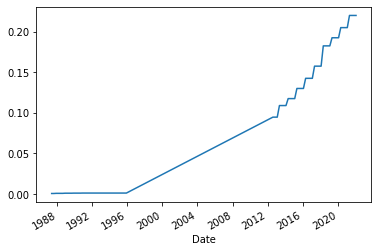

In [30]:
# 配当金の推移
aapl.dividends.plot()

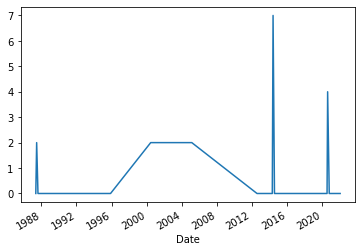

In [31]:
# 株式分割の履歴
aapl.actions['Stock Splits'].plot()

## 22. グラフ化のためのデータ整形
- streamlitと相性の良い[Altair](https://github.com/altair-viz/altair)を利用する
  - refer Altair site : https://altair-viz.github.io/index.html
  

In [32]:
!pip3 install altair


In [33]:
import altair as alt


In [35]:
# df作成
# 
df = get_yfinance_data(30, tickers)
df

Date,18 March 2022,21 March 2022,22 March 2022,23 March 2022,24 March 2022,25 March 2022,28 March 2022,29 March 2022,30 March 2022,31 March 2022,...,18 April 2022,19 April 2022,20 April 2022,21 April 2022,22 April 2022,25 April 2022,26 April 2022,27 April 2022,28 April 2022,29 April 2022
Name,,,,,,,,,,,,,,,,,,,,,
apple,163.979996,165.380005,168.820007,170.210007,174.070007,174.720001,175.600006,178.960007,177.770004,174.610001,...,165.070007,167.399994,167.229996,166.419998,161.789993,162.880005,156.800003,156.570007,163.639999,157.649994
facebook,216.490005,211.490005,216.649994,213.460007,219.570007,221.820007,223.589996,229.860001,227.850006,222.360001,...,210.770004,217.309998,200.419998,188.070007,184.110001,186.990005,180.949997,174.949997,205.729996,200.470001
google,2722.510010,2722.030029,2797.360107,2765.510010,2831.439941,2833.459961,2829.110107,2850.110107,2838.770020,2781.350098,...,2553.530029,2600.179932,2560.800049,2496.290039,2392.709961,2461.479980,2373.000000,2285.889893,2370.449951,2282.189941
microsoft,300.429993,299.160004,304.059998,299.489990,304.100006,303.679993,310.700012,315.410004,313.859985,308.309998,...,280.519989,285.299988,286.359985,280.809998,274.029999,280.720001,270.220001,283.220001,289.630005,277.519989
netflix,380.600006,374.589996,382.920013,374.489990,375.709991,373.850006,378.510010,391.820007,381.470001,374.589996,...,337.859985,348.609985,226.190002,218.220001,215.520004,209.910004,198.399994,188.539993,199.520004,190.360001
amazon,3225.010010,3229.830078,3297.780029,3268.159912,3272.989990,3295.469971,3379.810059,3386.300049,3326.020020,3259.949951,...,3055.699951,3162.310059,3079.959961,2965.919922,2887.000000,2921.479980,2787.820068,2763.340088,2891.929932,2485.629883


In [46]:
# 会社を絞る
companies = ['netflix', 'microsoft']
data = df.loc[companies]
data

Date,18 March 2022,21 March 2022,22 March 2022,23 March 2022,24 March 2022,25 March 2022,28 March 2022,29 March 2022,30 March 2022,31 March 2022,...,18 April 2022,19 April 2022,20 April 2022,21 April 2022,22 April 2022,25 April 2022,26 April 2022,27 April 2022,28 April 2022,29 April 2022
Name,,,,,,,,,,,,,,,,,,,,,
netflix,380.600006,374.589996,382.920013,374.48999,375.709991,373.850006,378.510010,391.820007,381.470001,374.589996,...,337.859985,348.609985,226.190002,218.220001,215.520004,209.910004,198.399994,188.539993,199.520004,190.360001
microsoft,300.429993,299.160004,304.059998,299.48999,304.100006,303.679993,310.700012,315.410004,313.859985,308.309998,...,280.519989,285.299988,286.359985,280.809998,274.029999,280.720001,270.220001,283.220001,289.630005,277.519989


In [47]:
# データ加工１：日付でソート
data.sort_index()
data


Date,18 March 2022,21 March 2022,22 March 2022,23 March 2022,24 March 2022,25 March 2022,28 March 2022,29 March 2022,30 March 2022,31 March 2022,...,18 April 2022,19 April 2022,20 April 2022,21 April 2022,22 April 2022,25 April 2022,26 April 2022,27 April 2022,28 April 2022,29 April 2022
Name,,,,,,,,,,,,,,,,,,,,,
netflix,380.600006,374.589996,382.920013,374.48999,375.709991,373.850006,378.510010,391.820007,381.470001,374.589996,...,337.859985,348.609985,226.190002,218.220001,215.520004,209.910004,198.399994,188.539993,199.520004,190.360001
microsoft,300.429993,299.160004,304.059998,299.48999,304.100006,303.679993,310.700012,315.410004,313.859985,308.309998,...,280.519989,285.299988,286.359985,280.809998,274.029999,280.720001,270.220001,283.220001,289.630005,277.519989


In [48]:
# データ加工２：ID、日付、会社名で並べる
data = data.T.reset_index()
data.head()

Name,Date,netflix,microsoft
0,18 March 2022,380.600006,300.429993
1,21 March 2022,374.589996,299.160004
2,22 March 2022,382.920013,304.059998
3,23 March 2022,374.489990,299.489990
4,24 March 2022,375.709991,304.100006


In [49]:
# データ加工３：「ID、日付、会社名、株価（USD）」へ加工
data = pd.melt(data, id_vars=['Date']).rename(
    columns={'value': 'Stock Prices(USD)'}
)
data

,Date,Name,Stock Prices(USD)
0,18 March 2022,netflix,380.600006
1,21 March 2022,netflix,374.589996
2,22 March 2022,netflix,382.920013
3,23 March 2022,netflix,374.489990
4,24 March 2022,netflix,375.709991
5,25 March 2022,netflix,373.850006
6,28 March 2022,netflix,378.510010
7,29 March 2022,netflix,391.820007
8,30 March 2022,netflix,381.470001
9,31 March 2022,netflix,374.589996


In [56]:
# グラフで表示
ymin, ymax = 150, 450

chart = (
    alt.Chart(data)
    .mark_line(opacity=0.8, clip=True)
    .encode(
        x="Date:T",
        y=alt.Y("Stock Prices(USD):Q", stack=None, scale=alt.Scale(domain=[ymin, ymax])),
        color='Name:N'
    )
)
chart

alt.Chart(...)